<a href="https://colab.research.google.com/github/JakubPac/kurs_ml/blob/main/hierarcjical_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import plotly.express as px
import sklearn
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(font_scale = 1.3)

In [25]:
from sklearn.datasets import make_blobs

data = make_blobs(n_samples = 10, centers = 2, cluster_std = 1.0, center_box = (-8.0, 8.0), random_state = 42)[0]
df = pd.DataFrame(data, columns = ['x1', 'x2'])

px.scatter(df, 'x1', 'x2', width = 900, height = 500, title = 'Grupowanie hierarchiczne', template = 'plotly_dark')

In [26]:
df.head()

,x1,x2
0,1.986985,1.016248
1,-2.470776,6.745699
2,-0.428145,7.978864
3,2.699072,1.892783
4,-2.241511,6.977292


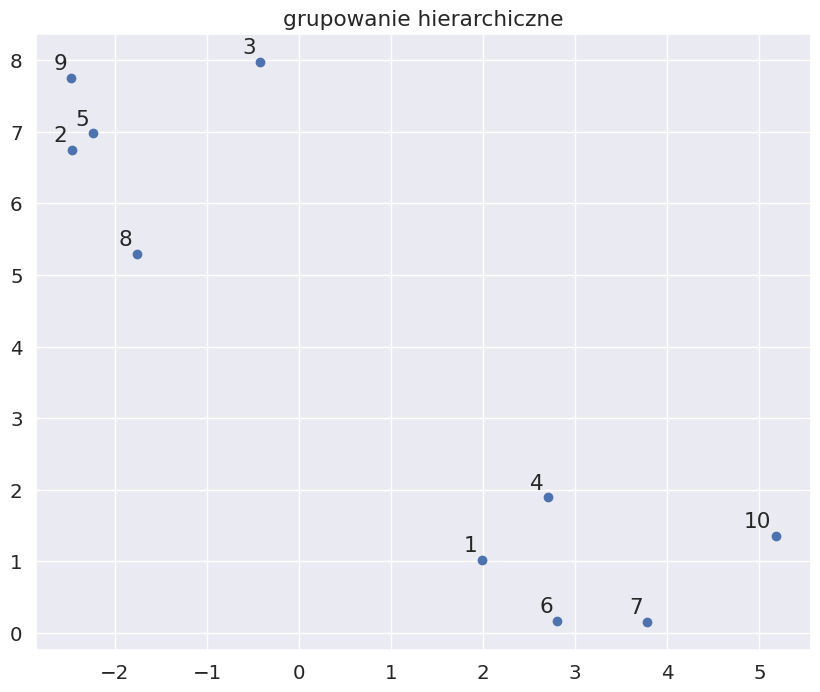

In [27]:
plt.figure(figsize = (10, 8))
plt.scatter(data[:,0],data[:,1])

for label, x, y in zip(range(1, 11), data[:,0], data[:,1]):
  plt.annotate(label, xy = (x,y), xytext = (-3,3), textcoords = 'offset points', ha = 'right', va = 'bottom')
plt.title('grupowanie hierarchiczne')
plt.show()

Dendrogram

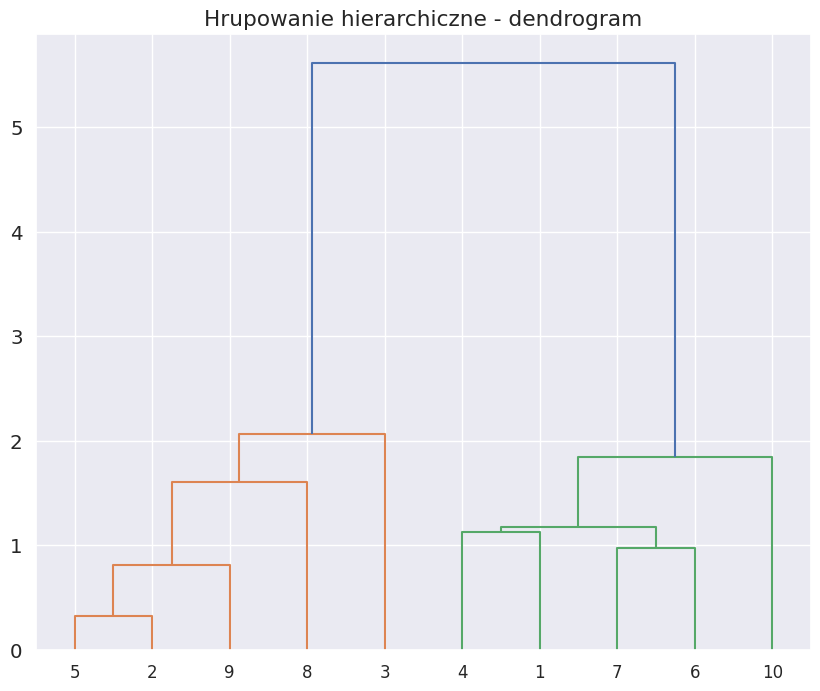

In [28]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(data)

plt.figure(figsize = (10, 8))
dendrogram(linked, orientation = 'top', labels = range(1, 11), distance_sort = 'descending', show_leaf_counts = True)
plt.title('Hrupowanie hierarchiczne - dendrogram')
plt.show()

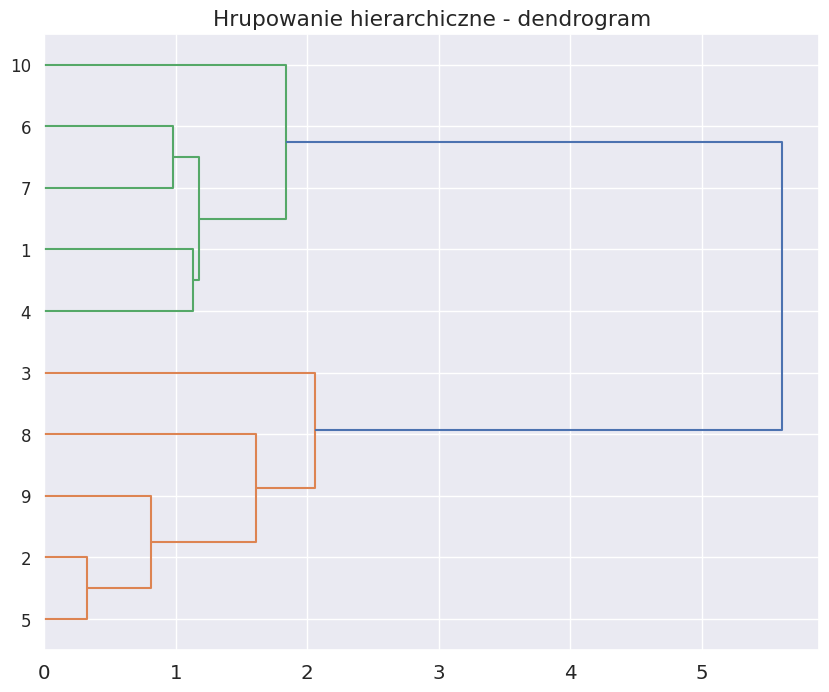

In [29]:
plt.figure(figsize = (10, 8))
dendrogram(linked, orientation = 'right', labels = range(1, 11), distance_sort = 'descending', show_leaf_counts = True)
plt.title('Hrupowanie hierarchiczne - dendrogram')
plt.show()

Grupowanie hierarchiczne


In [30]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 2)
cluster.fit_predict(data)

array([0, 1, 1, 0, 1, 0, 0, 1, 1, 0])

Wizualizacja klastrów

In [31]:
df = pd.DataFrame(data, columns = ['x1', 'x2'])
df['cluster'] = cluster.labels_

fig = px.scatter(df, 'x1', 'x2', 'cluster', width = 900, height = 500, template = 'plotly_dark', title = 'Grupowanie hierarchiczne', color_continuous_midpoint = 0.6)
fig.update_traces(marker_size = 12)
fig.show()

Porówanie metryk

In [32]:
data = make_blobs(n_samples = 1000, centers = 4, cluster_std = 1.0, center_box = (-8.0, 8.0), random_state = 42)[0]
df = pd.DataFrame(data, columns = ['x1', 'x2'])

px.scatter(df, 'x1', 'x2', width = 900, height = 500, title = 'Grupowanie hierarchiczne', template = 'plotly_dark')

Odległość euklidesowa

In [33]:
cluster_euklidean = AgglomerativeClustering(n_clusters = 4)
cluster_euklidean.fit_predict(data)

array([1, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 1, 3, 0, 0, 0, 3, 3, 3, 2, 2, 1,
       1, 1, 2, 2, 3, 3, 0, 2, 0, 0, 0, 3, 3, 1, 0, 2, 1, 1, 2, 0, 2, 1,
       2, 1, 3, 2, 1, 2, 0, 3, 2, 1, 3, 1, 3, 3, 3, 0, 0, 3, 0, 1, 2, 3,
       0, 0, 2, 3, 1, 3, 2, 0, 2, 1, 2, 3, 2, 3, 0, 3, 3, 3, 2, 1, 0, 0,
       3, 3, 3, 3, 2, 2, 1, 2, 1, 3, 2, 0, 2, 1, 1, 1, 1, 2, 2, 3, 0, 3,
       1, 0, 2, 2, 2, 2, 0, 1, 0, 2, 3, 0, 1, 2, 1, 0, 2, 1, 0, 2, 3, 0,
       2, 1, 2, 1, 3, 0, 2, 2, 3, 3, 1, 1, 1, 2, 2, 3, 3, 3, 3, 1, 0, 0,
       3, 2, 3, 2, 2, 1, 0, 3, 2, 0, 3, 3, 2, 0, 1, 0, 2, 3, 3, 2, 3, 1,
       0, 1, 0, 1, 2, 2, 3, 0, 3, 0, 2, 1, 3, 0, 2, 3, 2, 2, 3, 1, 0, 0,
       0, 1, 3, 0, 2, 3, 2, 2, 0, 3, 2, 0, 0, 1, 0, 0, 2, 3, 0, 3, 1, 2,
       1, 1, 0, 3, 1, 3, 2, 0, 0, 3, 3, 0, 3, 1, 0, 0, 1, 0, 0, 2, 0, 1,
       0, 2, 1, 3, 2, 3, 2, 2, 2, 2, 1, 2, 2, 0, 3, 0, 0, 2, 2, 2, 1, 2,
       1, 1, 0, 2, 3, 1, 2, 3, 2, 0, 3, 1, 2, 1, 0, 2, 1, 0, 1, 2, 0, 3,
       3, 0, 3, 1, 1, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0,

In [34]:
df_euclidean = pd.DataFrame(np.c_[data,cluster_euklidean.labels_], columns = ['x1', 'x2', 'cluster'])
df_euclidean.head()

,x1,x2,cluster
0,-6.787374,5.599913,1.0
1,-4.761606,-5.204795,0.0
2,-4.945375,-5.428082,0.0
3,3.252542,0.728691,2.0
4,3.452312,0.075393,2.0


In [36]:
fig = px.scatter(df_euclidean, 'x1', 'x2', 'cluster', width = 900, height = 500, title = 'Grupowanie hierarchiczne', template = 'plotly_dark', color_continuous_midpoint= 0.6)
fig.show()

Metryka Manhattan

In [38]:
cluster_manhattan = AgglomerativeClustering(n_clusters = 4, metric = 'manhattan', linkage = 'complete')
cluster_manhattan.fit_predict(data)

array([0, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 3, 1, 1, 1, 3, 3, 3, 2, 2, 0,
       0, 0, 2, 2, 3, 3, 1, 2, 1, 1, 1, 3, 3, 0, 1, 2, 0, 0, 2, 1, 2, 0,
       2, 0, 3, 2, 0, 2, 1, 3, 2, 0, 3, 0, 3, 3, 3, 1, 1, 3, 1, 0, 2, 3,
       1, 1, 2, 3, 0, 3, 2, 1, 2, 0, 2, 3, 2, 3, 1, 3, 3, 3, 2, 0, 1, 1,
       3, 3, 3, 3, 2, 2, 0, 2, 0, 3, 2, 1, 2, 0, 0, 0, 0, 2, 2, 3, 1, 3,
       0, 1, 2, 2, 2, 2, 1, 0, 1, 2, 3, 1, 0, 2, 0, 1, 2, 0, 1, 2, 3, 1,
       2, 0, 2, 0, 3, 1, 2, 2, 3, 3, 0, 0, 0, 2, 2, 3, 3, 3, 3, 0, 1, 1,
       3, 2, 3, 2, 2, 0, 1, 3, 2, 1, 3, 3, 2, 1, 0, 1, 2, 3, 3, 2, 3, 0,
       1, 0, 1, 0, 2, 2, 3, 1, 3, 1, 2, 0, 3, 1, 2, 3, 2, 2, 3, 0, 1, 1,
       1, 0, 3, 1, 2, 3, 2, 2, 1, 3, 2, 1, 1, 0, 1, 1, 2, 3, 1, 3, 0, 2,
       0, 0, 1, 3, 0, 3, 2, 1, 1, 3, 3, 1, 3, 0, 1, 1, 0, 1, 1, 2, 1, 0,
       1, 2, 0, 3, 2, 3, 2, 2, 2, 2, 0, 2, 2, 1, 3, 1, 1, 2, 2, 2, 0, 2,
       0, 0, 1, 2, 3, 0, 2, 3, 2, 1, 3, 0, 2, 0, 1, 2, 0, 1, 0, 2, 1, 3,
       3, 1, 3, 0, 0, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1,

In [40]:
df_manhattan = pd.DataFrame(np.c_[data,cluster_manhattan.labels_], columns = ['x1', 'x2', 'cluster'])
fig = px.scatter(df_manhattan, 'x1', 'x2', 'cluster', width = 900, height = 500, title = 'Grupowanie hierarchiczne', template = 'plotly_dark', color_continuous_midpoint= 0.6)
fig.show()

Metryka cosinusowa

In [42]:
cluster_cos = AgglomerativeClustering(n_clusters = 4, metric = 'cosine', linkage = 'complete')
cluster_cos.fit_predict(data)

array([0, 2, 2, 3, 3, 2, 1, 2, 2, 3, 3, 0, 0, 2, 2, 2, 0, 0, 0, 3, 1, 0,
       0, 0, 3, 1, 0, 0, 2, 1, 2, 2, 2, 0, 0, 0, 2, 1, 0, 0, 1, 2, 3, 0,
       1, 0, 0, 1, 0, 3, 2, 0, 3, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 1, 0,
       2, 2, 3, 0, 0, 0, 3, 2, 3, 0, 1, 0, 1, 0, 2, 0, 0, 0, 3, 0, 2, 2,
       0, 0, 0, 0, 3, 3, 0, 1, 0, 0, 3, 2, 3, 0, 0, 0, 0, 1, 3, 0, 2, 0,
       0, 2, 1, 3, 3, 3, 2, 0, 2, 3, 0, 2, 0, 1, 0, 2, 1, 0, 2, 1, 0, 2,
       3, 0, 3, 0, 0, 2, 3, 1, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 2, 2,
       0, 3, 0, 3, 1, 0, 2, 0, 1, 2, 0, 0, 3, 2, 0, 2, 1, 0, 0, 1, 0, 0,
       2, 0, 2, 0, 1, 3, 0, 2, 0, 2, 3, 0, 0, 2, 3, 0, 1, 1, 0, 0, 2, 2,
       2, 0, 0, 2, 1, 0, 1, 1, 2, 0, 3, 2, 2, 0, 2, 2, 1, 0, 2, 0, 0, 3,
       0, 0, 2, 0, 0, 0, 3, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 3, 2, 0,
       2, 3, 0, 0, 1, 0, 3, 3, 1, 1, 0, 3, 3, 2, 0, 2, 2, 3, 3, 1, 0, 1,
       0, 0, 2, 3, 0, 0, 3, 0, 1, 2, 0, 0, 1, 0, 2, 1, 0, 2, 0, 3, 2, 0,
       0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2,

In [43]:
df_cos = pd.DataFrame(np.c_[data,cluster_cos.labels_], columns = ['x1', 'x2', 'cluster'])
fig = px.scatter(df_cos, 'x1', 'x2', 'cluster', width = 900, height = 500, title = 'Grupowanie hierarchiczne', template = 'plotly_dark', color_continuous_midpoint= 0.6)
fig.show()

In [45]:
from plotly.subplots import make_subplots

fig = make_subplots(rows = 1, cols = 3, column_titles = ['euclidean', 'manhattan', 'cosine'])

fig1 = px.scatter(df_euclidean, 'x1', 'x2', 'cluster')['data'][0]
fig2 = px.scatter(df_manhattan, 'x1', 'x2', 'cluster')['data'][0]
fig3 = px.scatter(df_cos, 'x1', 'x2', 'cluster')['data'][0]

fig.add_trace(fig1, row = 1, col = 1)
fig.add_trace(fig2, row = 1, col = 2)
fig.add_trace(fig3, row = 1, col = 3)

fig.update_layout(template = 'plotly_dark')
fig.show()